# Projeto: Kaggle - Classificadores

## 1. Modelagem e Avaliação de Algoritmos (Machine Learning)

Nesta etapa, importamos uma variedade de algoritmos de **Aprendizado Supervisionado** e métricas de desempenho. O objetivo é testar diferentes abordagens de classificação para identificar qual modelo melhor se adapta aos dados de saúde processados.

### 1.1. Algoritmos de Classificação Importados:
* **Naive Bayes (GaussianNB):** Baseado em probabilidades estatísticas (Teorema de Bayes).
* **K-Nearest Neighbors (KNN):** Classifica com base na proximidade/vizinhança dos dados.
* **Decision Tree (Árvore de Decisão):** Cria regras lógicas de decisão em formato de árvore.
* **Random Forest:** Um conjunto (ensemble) de várias árvores de decisão para maior precisão.
* **Gradient Boosting:** Técnica que cria modelos de forma sequencial, corrigindo os erros do modelo anterior.
* **MLP Classifier (Redes Neurais):** Modelo de Perceptron Multicamadas, simulando o processamento neural para padrões complexos.

### 1.2. Métricas de Desempenho e Validação:
Para medir o sucesso dos modelos, utilizaremos:
* **Accuracy Score:** Porcentagem geral de acertos.
* **Confusion Matrix:** Tabela que mostra os erros e acertos para cada classe (Falsos Positivos, Falsos Negativos, etc.).
* **Precision, Recall e F1-Score:** Métricas detalhadas para entender a performance em cada categoria do exame.
* **Cross-Validation (Validação Cruzada):** Técnica que divide os dados em várias partes para garantir que o resultado seja consistente e não dependa de uma única divisão sorteada.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


### 2. Carregamento dos Dados Processados
Nesta etapa, realizamos a leitura do arquivo `healthcare.pkl` que foi gerado anteriormente.

* **Desserialização:** Utilizamos a função `pickle.load` para converter o arquivo binário de volta para variáveis do Python (arrays NumPy).
* **Agilidade no Fluxo:** Carregar os dados desta forma permite que possamos reiniciar o trabalho diretamente na fase de treinamento dos modelos, sem precisar executar novamente todos os blocos de código de limpeza, normalização e codificação.
* **Modo de Leitura (`rb`):** O arquivo é aberto no modo de "leitura binária", garantindo que os dados sejam restaurados exatamente como foram salvos.

In [ ]:
# importar dados pickle

with open("healthcare.pkl", "rb") as f:
    x_previsores_treinamento, y_classe_treinamento, x_previsores_teste, y_classe_teste = pickle.load(f)

In [ ]:
print(type(y_classe_teste),type(y_classe_treinamento),type(x_previsores_teste),type(x_previsores_treinamento))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(x_previsores_treinamento))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x_previsores_treinamento= x_previsores_treinamento.values

In [ ]:
print(type(x_previsores_treinamento))

<class 'numpy.ndarray'>


In [ ]:
x_previsores_treinamento

array([[ 0.        , -0.1167113 ,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.40789474,  0.5222094 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69736842,  0.78747805,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.63157895,  1.40991916,  2.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.94736842, -1.30910384,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.30263158,  1.30594809,  2.        , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
print(type(x_previsores_treinamento))

<class 'numpy.ndarray'>


In [ ]:
x_previsores_teste = x_previsores_teste.values

In [ ]:
x_previsores_treinamento.shape

(38476, 21)

In [ ]:
x_previsores_teste.shape

(16490, 21)

In [ ]:
y_classe_treinamento.shape

(38476,)

In [ ]:
y_classe_teste.shape

(16490,)

# NAIVE BAYES

### 3. Treinamento do Modelo: Naive Bayes (Gaussian)

Nesta etapa, iniciamos o processo de aprendizado utilizando o algoritmo **Gaussian Naive Bayes**.

* **O Algoritmo:** O Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes. A versão "Gaussian" assume que os dados numéricos (como idade e valores de cobrança) seguem uma distribuição normal (curva de Gauss).
* **O Método `.fit()`:** É aqui que o "treinamento" acontece de fato. O modelo analisa os pares de dados (`x_previsores_treinamento` e `y_classe_treinamento`) para calcular as probabilidades de cada característica pertencer a um determinado resultado de teste (Normal, Inconclusivo ou Anormal).
* **Vantagem:** É um modelo extremamente rápido e eficiente, servindo como uma excelente "linha de base" (baseline) para compararmos com algoritmos mais complexos posteriormente.





### Gerar modelo de treinamento

In [ ]:
# Modelo de treinamento
naive_bayes_healthcare = GaussianNB()
naive_bayes_healthcare.fit(x_previsores_treinamento,y_classe_treinamento)

GaussianNB()

**O Método `.predict()`:** Este comando solicita que o modelo Naive Bayes analise os dados de `x_previsores_teste` (dados que ele nunca viu durante o treinamento) e atribua a cada paciente uma classe: 0 (Normal), 1 (Inconclusivo) ou 2 (Abnormal).


In [ ]:
previsao = naive_bayes_healthcare.predict(x_previsores_teste)

In [ ]:
previsao

array([1, 2, 2, ..., 2, 0, 2])

In [ ]:
y_classe_teste

array([0, 2, 0, ..., 1, 1, 1])

In [ ]:
accuracy_score(previsao,y_classe_teste)

0.3372953305033354

### 3.1. Avaliação: Matriz de Confusão
Nesta etapa, utilizamos a **Matriz de Confusão** para obter uma visão detalhada de onde o modelo está acertando e onde está confundindo as classes.

* **O que ela mostra:** A matriz compara as previsões feitas pelo modelo (`previsao`) com os resultados reais esperados (`y_classe_teste`).
* **Diagonal Principal:** Os valores na diagonal principal da matriz representam os acertos (previsões que coincidem com a realidade).
* **Erros de Classificação:** Os valores fora da diagonal indicam, por exemplo, quantas vezes o modelo previu "Abnormal" quando o resultado era "Normal" (Falsos Positivos) ou vice-versa (Falsos Negativos).


In [ ]:
confusion_matrix(previsao,y_classe_teste)

array([[1819, 1788, 1820],
       [1603, 1658, 1631],
       [2035, 2051, 2085]])

### 3.2. Visualização Gráfica: Matriz de Confusão (Yellowbrick)

Nesta etapa, utilizamos a biblioteca **Yellowbrick** para gerar uma versão visual e mais intuitiva da matriz de confusão. Enquanto a função padrão do Scikit-Learn retorna apenas um array numérico, o `ConfusionMatrix` do Yellowbrick cria um mapa de calor (heatmap).

* **`ConfusionMatrix(naive_bayes_healthcare)`:** Inicializa o visualizador associado ao nosso modelo treinado. Ele automaticamente identifica as classes (0, 1 e 2) e mapeia as predições.
* **Mapeamento de Cores:** As cores mais intensas facilitam a identificação imediata de onde se concentram os acertos (diagonal) e os erros.
* **Interpretabilidade:** Esta visualização permite identificar rapidamente se o modelo está tendo dificuldades específicas em distinguir, por exemplo, um resultado "Inconclusivo" de um "Anormal", o que é fundamental para a segurança na tomada de decisão médica.
* **`cm.score()`:** Calcula a performance no conjunto de teste e desenha a matriz com os rótulos de classe, tornando a apresentação dos resultados muito mais profissional e legível para relatórios técnicos.

0.3372953305033354

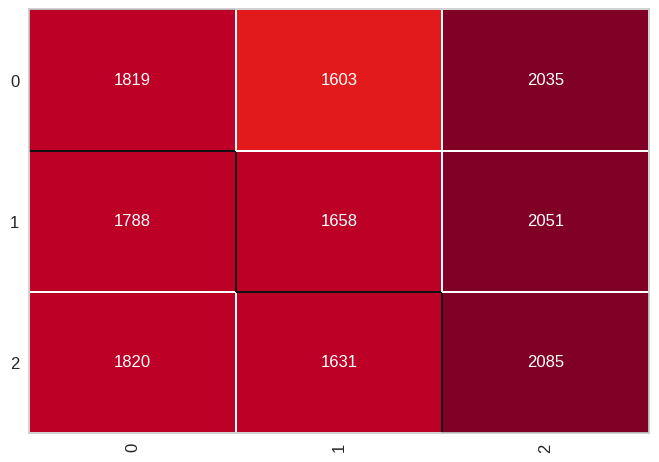

In [ ]:
cm = ConfusionMatrix(naive_bayes_healthcare)
cm.fit(x_previsores_treinamento,y_classe_treinamento)
cm.score(x_previsores_teste,y_classe_teste)

## 3.3 Validação Cruzada (K-Fold Cross-Validation)

Nesta etapa, realizamos um teste de estresse no modelo para garantir que a sua performance seja consistente e não tenha sido fruto de uma divisão "sortuda" ou "azarada" dos dados de treino e teste.

### Funcionamento do K-Fold
O algoritmo divide o conjunto de treinamento em **10 partes (folds)**. O processo ocorre da seguinte forma:
1.  O modelo é treinado em 9 partes e testado na 1 parte restante.
2.  Isso se repete 10 vezes, garantindo que cada parte dos dados seja usada como teste exatamente uma vez.
3.  Ao final, calculamos a média de todos os resultados.


### Interpretando as Métricas
* **Média Final:** Representa a acurácia esperada do modelo em dados reais. Se a média for baixa (próxima a 33% em um problema de 3 classes), o modelo está performando de forma aleatória.
* **Desvio Padrão:** Mede a estabilidade. Um desvio padrão alto indica que o modelo é muito instável (funciona bem com alguns dados, mas muito mal com outros). Um desvio baixo indica que o modelo é confiável em sua (in)capacidade de prever.


In [ ]:
#  Validação Cruzada (K-Fold)


scores_naive_bayes = cross_val_score(naive_bayes_healthcare, x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (10 Folds) ---")
print(f"Scores de cada rodada: {scores_naive_bayes}")
print(f"Média Final: {scores_naive_bayes.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_naive_bayes.std():.4f}")


--- Resultados do K-Fold (10 Folds) ---
Scores de cada rodada: [0.34121622 0.33627859 0.33939709 0.33653846 0.34615385 0.34381497
 0.33038731 0.32570834 0.33168703 0.3254484 ]
Média Final: 33.57%
Desvio Padrão: 0.0069


### 3.4 Métrica de Avaliação: F1-Score (Macro)

Nesta etapa, calculamos o **F1-Score**, uma métrica que combina Precisão e Sensibilidade (Recall) em um único valor, sendo especialmente útil quando queremos um equilíbrio entre essas duas medidas.

* **O que é o F1-Score?** Ele é a média harmônica entre a precisão (capacidade de não classificar como positivo um caso negativo) e o recall (capacidade de encontrar todos os casos positivos).
* **O parâmetro `average='macro'`:** Como nosso problema possui três classes (Normal, Inconclusivo e Abnormal), o cálculo 'macro' trata todas as classes com o mesmo peso, independentemente de quantas amostras existem em cada uma. Isso é ideal para verificar se o modelo é bom em prever todas as categorias de exames de forma justa.
* **Interpretação:** Valores próximos a 1 indicam um modelo perfeito, enquanto valores baixos sugerem que o modelo está falhando significativamente em pelo menos uma das categorias de diagnóstico.

In [ ]:
f1_score(y_classe_teste,previsao,average='macro')

0.33654433741505874

### 3.5 Métrica de Avaliação: Recall Score (Sensibilidade)

Nesta etapa, calculamos o **Recall** (também conhecido como Sensibilidade ou Revocação), que é uma das métricas mais críticas em contextos médicos.

* **O que o Recall mede?** Ele responde à pergunta: *"De todos os pacientes que realmente tinham um resultado 'Abnormal', quantos o modelo conseguiu identificar corretamente?"*
* **Importância na Saúde:** Um Recall baixo em diagnósticos médicos é perigoso, pois significa que o modelo está gerando muitos **Falsos Negativos** (pacientes doentes que o modelo classifica como saudáveis), resultando na perda de oportunidades de tratamento.
* **Parâmetro `average='macro'`:** Assim como no F1-Score, o cálculo 'macro' calcula o Recall individual para cada uma das três classes e tira a média aritmética, garantindo que o desempenho na identificação de casos "Normais" não mascare uma possível falha na identificação de casos "Abnormais".

In [ ]:
recall_score(y_classe_teste,previsao,average='macro')

0.3371927069404004

### 3.6 Métrica de Avaliação: Precision Score (Precisão)

Nesta etapa, calculamos a **Precisão**, que foca na confiabilidade das predições positivas do modelo.

* **O que a Precisão mede?** Ela responde à pergunta: *"De todos os pacientes que o modelo classificou como 'Abnormal', quantos realmente eram 'Abnormal'?"*
* **Importância Clínica:** Uma precisão baixa significa que o modelo gera muitos **Falsos Positivos**. No setor de saúde, isso pode levar a estresse desnecessário para o paciente, custos com exames complementares e sobrecarga do sistema hospitalar com casos que, na verdade, eram normais ou inconclusivos.
* **Parâmetro `average='macro'`:** O cálculo 'macro' tira a média da precisão para as três classes (Normal, Inconclusivo e Abnormal) de forma igualitária. Isso nos permite avaliar se o modelo é "cuidadoso" ao atribuir qualquer um dos diagnósticos.


In [ ]:
precision_score(y_classe_teste,previsao,average='macro')

0.33732244809727024

# ARVORE DECISÃO

### 4. Treinamento do Modelo: Árvore de Decisão (Decision Tree)

Nesta etapa, utilizamos o algoritmo de **Árvore de Decisão**, um dos modelos mais explicáveis e intuitivos no aprendizado supervisionado.

* **O Algoritmo:** A Árvore de Decisão funciona criando uma série de perguntas (nós) baseadas nas características dos pacientes (ex: "A idade é maior que 50?", "A medicação é X?"). Cada resposta leva a uma ramificação até chegar a uma "folha", que representa a classificação final.
* **Vantagem de Interpretabilidade:** Diferente de modelos "caixa-preta", a Árvore de Decisão permite visualizar exatamente quais critérios o modelo usou para chegar a um diagnóstico, o que é fundamental para a auditoria médica e segurança do paciente.
* **Processo de Fit:** O método `.fit()` analisa os dados de treinamento para encontrar os melhores "pontos de corte" (divisões) que maximizam a pureza dos grupos resultantes, tentando separar o melhor possível os casos Normais, Inconclusivos e Anormais.



In [ ]:
tree_decision_healthcare = DecisionTreeClassifier()
tree_decision_healthcare.fit(x_previsores_treinamento,y_classe_treinamento)

DecisionTreeClassifier()

### 4.1. Execução de Previsões (Árvore de Decisão)

Com a Árvore de Decisão devidamente treinada, realizamos o teste de predição para avaliar como o modelo se comporta com os dados que foram reservados.

* **O Processo:** O modelo percorre os ramos da árvore criada durante o treinamento, aplicando as regras lógicas aos dados de `x_previsores_teste` para determinar a classe final de cada registro.
* **Variável `previsao_tree`:** Os resultados (os diagnósticos previstos) são armazenados nesta nova variável. É importante manter nomes distintos (como `previsao_tree` em vez de apenas `previsao`) para que possamos comparar o desempenho da Árvore de Decisão com o do Naive Bayes lado a lado.


In [ ]:
previsao_tree = tree_decision_healthcare.predict(x_previsores_teste)

In [ ]:
previsao_tree

array([1, 2, 2, ..., 1, 2, 2])

In [ ]:
y_classe_teste

array([0, 2, 0, ..., 1, 1, 1])

### 4.2. Avaliação de Desempenho: Acurácia da Árvore

Nesta etapa, calculamos a **Acurácia** da Árvore de Decisão, que representa a proporção total de diagnósticos corretos em relação ao total de casos testados.

* **O Cálculo:** A função compara cada previsão contida em `previsao_tree` com o gabarito real em `y_classe_teste`.
* **Comparação de Modelos:** Ao comparar este resultado com a acurácia do Naive Bayes, podemos determinar qual arquitetura de algoritmo "entendeu" melhor a lógica dos dados médicos.
* **Limitação da Acurácia:** Embora seja um número fácil de entender, lembramos que na área da saúde a acurácia sozinha pode ser enganosa se os dados forem desbalanceados. Por isso, a Árvore de Decisão costuma ser avaliada também por sua estrutura interna para garantir que ela não está criando regras "viciadas" em casos específicos (overfitting).

In [ ]:
accuracy_score(previsao_tree,y_classe_teste)

0.3877501516070346

0.3877501516070346

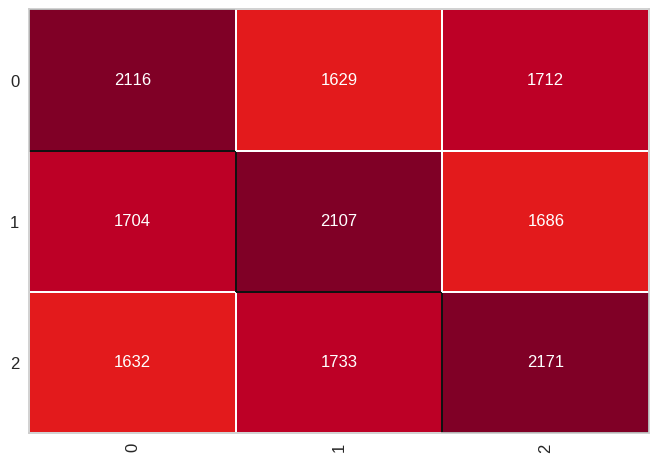

In [ ]:
cm = ConfusionMatrix(tree_decision_healthcare)
cm.fit(x_previsores_treinamento,y_classe_treinamento)
cm.score(x_previsores_teste,y_classe_teste)

### 4.3. Validação Cruzada (K-Fold) para Árvore de Decisão

Nesta etapa, aplicamos a **Validação Cruzada** à Árvore de Decisão para verificar a estabilidade e a confiabilidade das regras que o modelo criou.

* **Importância para Árvores:** Árvores de Decisão são algoritmos conhecidos por serem "instáveis". Pequenas mudanças nos dados de treinamento podem gerar árvores completamente diferentes e resultados muito variados. O K-Fold ajuda a confirmar se o modelo é consistente em diferentes subconjuntos de dados.
* **Média Final:** Nos dá uma estimativa realista do desempenho do modelo. Se a acurácia média for muito superior à do Naive Bayes, a Árvore de Decisão passa a ser nossa candidata principal para o sistema de diagnóstico.
* **Desvio Padrão:** Em Árvores de Decisão, um desvio padrão baixo é um excelente sinal. Ele indica que o algoritmo não está sofrendo de



In [ ]:
# Validação Cruzada (K-Fold)

scores_tree_decision = cross_val_score(tree_decision_healthcare, x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (10 Folds) ---")
print(f"Scores de cada rodada: {scores_tree_decision}")
print(f"Média Final: {scores_tree_decision.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_tree_decision.std():.4f}")


--- Resultados do K-Fold (10 Folds) ---
Scores de cada rodada: [0.39760915 0.37344075 0.38539501 0.37370062 0.38825364 0.39449064
 0.38081622 0.38393553 0.37535742 0.38393553]
Média Final: 38.37%
Desvio Padrão: 0.0079


# RANDOM FLOREST


## 5. Treinamento do Modelo: Random Forest (Floresta Aleatória)

Nesta etapa, utilizamos o **Random Forest**, um dos algoritmos mais poderosos e versáteis para classificação. Ele pertence à categoria de *Ensemble Learning* (Aprendizado de Conjunto).

* **O Conceito:** Em vez de confiar em apenas uma árvore de decisão, o Random Forest cria múltiplas árvores (`n_estimators=200`) de forma independente e combina seus resultados. A decisão final é tomada por meio de uma "votação": a classe mais votada entre as 200 árvores é a escolhida.
* **Parâmetros Utilizados:**
    * **`n_estimators=200`**: Define que criaremos 200 árvores diferentes para compor a floresta.
    * **`criterion="entropy"`**: Utiliza o ganho de informação (entropia) para decidir como cada árvore deve ser dividida, buscando os ramos mais puros possíveis.
    * **`random_state=0`**: Garante que o resultado seja reproduzível.
* **Vantagem:** O Random Forest resolve o principal problema da árvore de decisão única: a instabilidade. Ele é muito mais robusto contra *overfitting* e lida melhor com grandes conjuntos de dados de saúde.

In [ ]:
random_forest_healthcare = RandomForestClassifier(n_estimators=200, criterion="entropy",random_state=0)
random_forest_healthcare.fit(x_previsores_treinamento,y_classe_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

### 5.1. Execução de Previsões (Random Forest)

Com a "floresta" de 200 árvores treinada, passamos para a fase de teste para observar como esse conjunto de modelos trabalha em conjunto para classificar novos pacientes.

* **O Processo de Votação:** Diferente dos modelos anteriores, quando executamos o `.predict()`, cada uma das 200 árvores gera sua própria previsão. O `RandomForestClassifier` contabiliza esses votos e atribui ao paciente a classe que recebeu a maioria das indicações.
* **Variável `previsao_random_florest`:** Armazena os resultados finais da floresta. Por ser um modelo de conjunto (*Ensemble*), esperamos que essas previsões sejam mais estáveis e menos sensíveis a ruídos nos dados do que uma árvore de decisão única.
* **Redução de Erro:** Este método tende a reduzir a variância do erro, o que significa que o modelo costuma errar menos quando confrontado com dados clínicos reais que ele nunca viu antes.

In [ ]:
previsao_random_florest = random_forest_healthcare.predict(x_previsores_teste)

In [ ]:
previsao_random_florest

array([0, 2, 1, ..., 2, 1, 2])

In [ ]:
y_classe_teste

array([0, 2, 0, ..., 1, 1, 1])

### 5.2. Avaliação de Desempenho: Acurácia da Floresta

Nesta etapa, calculamos a **Acurácia** do modelo Random Forest para verificar se a combinação de múltiplas árvores resultou em uma performance superior aos modelos anteriores.

* **Poder do Coletivo:** A acurácia aqui reflete o sucesso da "votação" entre os 200 estimadores. Geralmente, o Random Forest apresenta um resultado mais robusto do que uma única Árvore de Decisão, pois os erros individuais de cada árvore tendem a ser cancelados pela maioria.
* **Métrica Comparativa:** Ao observar este valor, podemos compará-lo diretamente com os valores obtidos no **Naive Bayes** e na **Árvore de Decisão**.
* **Ponto de Atenção:** Se a acurácia for muito alta no treino mas cair significativamente no teste, o gráfico de importância de características (visto anteriormente) pode nos ajudar a entender se o modelo está focando em variáveis irrelevantes (como o valor da conta hospitalar) para tentar prever um resultado clínico.

In [ ]:
accuracy_score(previsao_random_florest,y_classe_teste)

0.4137052759248029

### 5.3. Análise de Importância das Características (Feature Importance)


* **O que é Feature Importance?** Durante o treinamento das 200 árvores, o algoritmo calcula o quanto cada variável (como Idade, Tipo de Admissão ou Medicamento) ajudou a reduzir a incerteza nos dados. Quanto maior o valor, mais "decisiva" é aquela coluna.
* **Visualização com Gráfico de Barras:** O código utiliza o método `nlargest(10)` para isolar os 10 fatores que mais influenciaram o resultado do teste (`Test Results`).




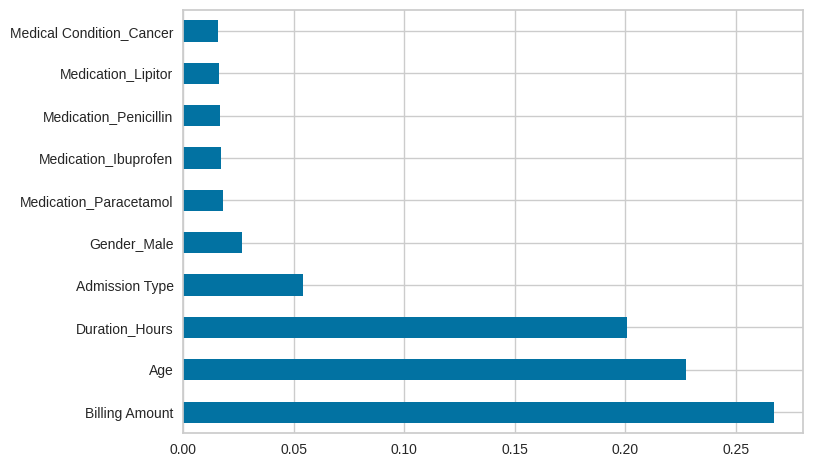

In [ ]:

# Veja quais colunas são mais importantes
importancias = pd.Series(random_forest_healthcare.feature_importances_, index=['Age','Billing Amount','Admission Type',
        'Duration_Hours', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'])
importancias.nlargest(10).plot(kind='barh')
plt.show()

0.4137052759248029

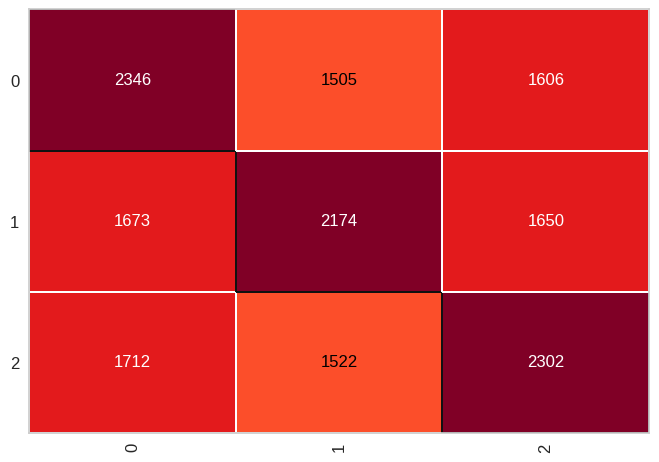

In [ ]:
cm = ConfusionMatrix(random_forest_healthcare)
cm.fit(x_previsores_treinamento,y_classe_treinamento)
cm.score(x_previsores_teste,y_classe_teste)

### 5.4. Validação Cruzada (K-Fold) para Random Forest

Nesta etapa, aplicamos a **Validação Cruzada** ao modelo de Floresta Aleatória para atestar sua robustez em diferentes partições do banco de dados.

* **Validação do Ensemble:** Como o Random Forest já é um modelo que utiliza amostragem interna (bootstrapping), o K-Fold funciona como uma camada extra de segurança. Ele garante que a combinação das 200 árvores não está apenas se ajustando a uma parte específica dos dados de treino.
* **Média Final:** Esta métrica fornece a estimativa mais confiável da capacidade preditiva do modelo. Em modelos complexos como o Random Forest, uma média estável em torno dos resultados anteriores confirma que o modelo é capaz de lidar com a variabilidade natural dos dados hospitalares.
* **Análise de Variabilidade (Desvio Padrão):** O desvio padrão nos diz o quão "arriscado" é o modelo. No caso do Random Forest, esperamos um desvio padrão menor do que o da Árvore de Decisão única, o que indicaria que a floresta é um modelo mais confiável e menos sujeito a variações bruscas de performance.

In [ ]:
# Validação Cruzada (K-Fold)
# Aqui verificamos se os 33% foram "azar" da divisão ou se o modelo é instável
scores_random_florest = cross_val_score(random_forest_healthcare, x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (10 Folds) ---")
print(f"Scores de cada rodada: {scores_random_florest}")
print(f"Média Final: {scores_random_florest.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_random_florest.std():.4f}")


--- Resultados do K-Fold (10 Folds) ---
Scores de cada rodada: [0.41346154 0.40072765 0.39423077 0.41709979 0.3991684  0.41164241
 0.40811022 0.40421107 0.41564856 0.40603067]
Média Final: 40.70%
Desvio Padrão: 0.0072


# KNN


### 6. Treinamento do Modelo: K-Nearest Neighbors (KNN)

Nesta etapa, utilizamos o algoritmo **KNN (K-Vizinhos Mais Próximos)**, que utiliza uma lógica baseada em similaridade e distância espacial entre os dados.

* **O Conceito:** O KNN não cria regras ou fórmulas matemáticas complexas. Ele simplesmente armazena os dados de treinamento e, ao receber um novo paciente, verifica quais são os **5 vizinhos mais próximos** (`n_neighbors=5`) a ele no espaço de dados. A classe (resultado do teste) é decidida pela maioria entre esses vizinhos.
* **Parâmetros Utilizados:**
    * **`metric='minkowski'` e `p=2`**: Definem que o cálculo da distância entre os pacientes será a **Distância Euclidiana** (a linha reta entre dois pontos), que é a métrica mais comum para dados numéricos.
* **Vantagem:** É um modelo intuitivo e "preguiçoso" (*lazy learner*), o que significa que ele é muito rápido para treinar, mas exige que os dados estejam bem normalizados (como fizemos nas etapas anteriores) para que as distâncias não sejam distorcidas por colunas com escalas diferentes.

In [ ]:
knn_healthcare = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_healthcare.fit(x_previsores_treinamento, y_classe_treinamento)

KNeighborsClassifier()

### 6.1. Execução de Previsões (KNN)

Com o modelo **KNN** treinado, realizamos a predição para o conjunto de teste, onde o algoritmo calculará a vizinhança para cada novo registro.

* **Cálculo de Proximidade:** Para cada paciente em `x_previsores_teste`, o modelo busca no banco de dados de treinamento os 5 casos mais parecidos (vizinhos) e atribui a classe dominante entre eles.
* **Sensibilidade a Escalas:** Como o KNN baseia-se em distâncias, a qualidade dessas previsões armazenadas em `previsao_knn` depende diretamente do pré-processamento (como o escalonamento de valores de cobrança e idade) realizado anteriormente.
* **Comparação de Estratégia:** Esta variável nos permitirá entender se pacientes com características clínicas similares tendem a ter resultados de exames similares, validando a premissa de que a "vizinhança" estatística faz sentido para este conjunto de dados de saúde.

In [ ]:
previsao_knn = knn_healthcare.predict(x_previsores_teste)

### 6.2. Avaliação de Desempenho: Acurácia do KNN
Nesta etapa, calculamos a Acurácia para o modelo K-Nearest Neighbors, medindo o percentual de acertos com base na similaridade entre os registros.

* **O Resultado:** A função compara a previsao_knn com o y_classe_teste. Uma acurácia alta aqui indicaria que pacientes com perfis demográficos e clínicos parecidos realmente tendem a apresentar o mesmo desfecho (Normal, Inconclusivo ou Abnormnal).

* **O Desafio da Dimensionalidade:** O KNN pode sofrer quando há muitas colunas (variáveis), pois a "distância" entre os pontos torna-se menos clara. Comparar este número com o do Random Forest nos ajudará a decidir se modelos baseados em distância são adequados para este volume de dados hospitalares.



In [ ]:
accuracy_score(previsao_knn,y_classe_teste)

0.3593086719223772

0.3593086719223772

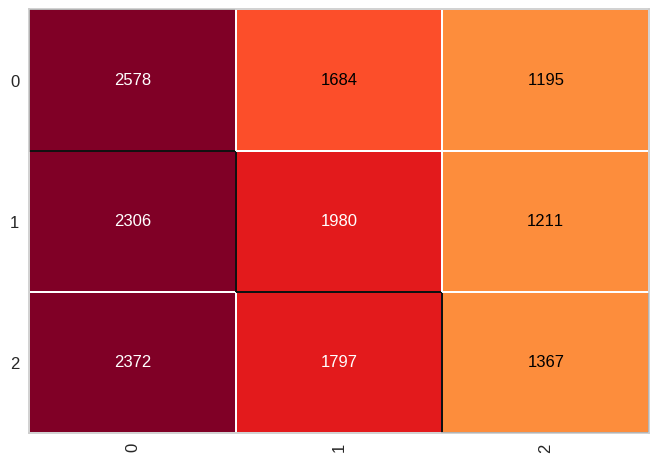

In [ ]:
cm = ConfusionMatrix(knn_healthcare)
cm.fit(x_previsores_treinamento,y_classe_treinamento)
cm.score(x_previsores_teste,y_classe_teste)

### 6.3. Validação Cruzada (K-Fold) para KNN 🔄
Nesta etapa, aplicamos a Validação Cruzada ao modelo KNN para verificar se a performance baseada em similaridade espacial (vizinhança) é consistente ou se foi influenciada por uma divisão específica dos dados.

* **Estabilidade do Modelo:** O KNN pode ser sensível a ruídos e outliers. O K-Fold divide o conjunto de treinamento em 10 partes (folds), treinando e testando o modelo 10 vezes para garantir que o resultado não seja fruto do "acaso".

* **Média Final:** Representa a estimativa real de acerto do modelo em produção. Como estamos lidando com 3 classes (Normal, Inconclusivo, Abnormal), uma média significativamente acima de 33.3% indica que o modelo está de fato aprendendo padrões.

* **Desvio Padrão:** Mede a "confiabilidade". Um desvio padrão baixo indica que o KNN é estável e mantém o mesmo nível de acerto independentemente de quais pacientes estão no grupo de teste.

In [ ]:
#  Validação Cruzada (K-Fold)
# Aqui verificamos se os 33% foram "azar" da divisão ou se o modelo é instável
scores_knn = cross_val_score(knn_healthcare, x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (10 Folds) ---")
print(f"Scores de cada rodada: {scores_knn}")
print(f"Média Final: {scores_knn.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_knn.std():.4f}")


--- Resultados do K-Fold (10 Folds) ---
Scores de cada rodada: [0.3539501  0.375      0.36044699 0.36434511 0.370842   0.36824324
 0.36210034 0.36469977 0.35586171 0.36054068]
Média Final: 36.36%
Desvio Padrão: 0.0062


# MLP

### 7. Treinamento do Modelo: Redes Neurais (MLP - Multi-Layer Perceptron)
Nesta etapa, utilizamos uma rede neural artificial do tipo MLP, que simula de forma simplificada o processamento de informações do cérebro humano através de camadas de neurônios interconectados.

* **Arquitetura da Rede (hidden_layer_sizes=(100, 50)):** Configuramos duas camadas ocultas, a primeira com 100 neurônios e a segunda com 50. Essa estrutura permite que o modelo aprenda relações não-lineares complexas entre as variáveis (ex: a combinação específica de idade, medicamento e tipo de admissão).

* **Processo de Aprendizado (max_iter=500):** O modelo utiliza o algoritmo de backpropagation para ajustar os pesos de cada conexão por até 500 iterações, buscando minimizar o erro entre a previsão e o diagnóstico real.

* **Interação e Convergência:** Através do parâmetro verbose, podemos monitorar a queda da "função de perda" (loss). Se a perda parar de cair, a rede entende que atingiu o seu máximo de aprendizado.

In [ ]:
mlp_healthcare = MLPClassifier(hidden_layer_sizes=(100, 50),
                               max_iter=500,
                               random_state=1,
                               verbose=False) # mude para True se quiser ver ela 'aprendendo'

mlp_healthcare.fit(x_previsores_treinamento, y_classe_treinamento)



MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=1)

In [ ]:
previsoes_mlp = mlp_healthcare.predict(x_previsores_teste)

### 7.1. Validação Cruzada (K-Fold) para Redes Neurais
Nesta etapa, aplicamos a Validação Cruzada à Rede Neural (MLP) para avaliar a sua robustez e garantir que a sua capacidade de aprendizagem é consistente em diferentes amostras de dados.

* **Validação de Pesos:** As Redes Neurais podem, por vezes, convergir para soluções muito específicas de um conjunto de dados (overfitting). O K-Fold divide os dados de treino em 10 partes, garantindo que o modelo seja testado em diferentes subconjuntos e que os pesos ajustados funcionem de forma generalista.

* **Média Final:** Representa a acurácia esperada da rede neural em condições reais. Como este modelo é capaz de captar relações não-lineares, a sua média comparada com a do Naive Bayes ou Random Forest revela se a complexidade da rede trouxe ganhos reais de performance.

* **Desvio Padrão:** Em Redes Neurais, o desvio padrão indica a estabilidade do processo de convergência. Um valor baixo confirma que a arquitetura escolhida (100, 50 neurónios) é adequada para o problema e não produz resultados erráticos.

In [ ]:
# --- ETAPA 4: Validação Cruzada (K-Fold) ---
# Aqui verificamos se os 33% foram "azar" da divisão ou se o modelo é instável
# Usamos o X e y completos ou apenas o conjunto de treino
scores_mlp = cross_val_score(mlp_healthcare, x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (10 Folds) ---")
print(f"Scores de cada rodada: {scores_mlp}")
print(f"Média Final: {scores_mlp.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_mlp.std():.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Resultados do K-Fold (10 Folds) ---
Scores de cada rodada: [0.3718815  0.37214137 0.36070686 0.36772349 0.36772349 0.37006237
 0.37093839 0.37587731 0.36106057 0.37431765]
Média Final: 36.92%
Desvio Padrão: 0.0048


# Gradient Boosting

### 8. Treinamento do Modelo: Gradient Boosting Classifier
Nesta etapa, utilizamos o Gradient Boosting, um dos algoritmos de aprendizado de máquina mais performáticos da atualidade, baseado no conceito de Ensemble sequencial.

* **O Conceito de Boosting:** Diferente do Random Forest (onde as árvores são criadas de forma independente), o Gradient Boosting cria árvores de forma sequencial. Cada nova árvore é construída para corrigir os erros cometidos pelas árvores anteriores, focando nos casos onde o modelo ainda apresenta dificuldades.

* **Parâmetros Utilizados:**

* **n_estimators=100:** Define que o modelo passará por 100 estágios de correção sequencial.

* **learning_rate=0.1:** Controla a contribuição de cada nova árvore. Um valor menor exige mais árvores, mas geralmente resulta em uma melhor capacidade de generalização.

* **max_depth=3:** Limita a profundidade de cada árvore individual ("weak learners"), evitando que o modelo se torne excessivamente complexo e sofra overfitting.

In [ ]:
boosting_healthcare = GradientBoostingClassifier(n_estimators=100,
                                                  learning_rate=0.1,
                                                  max_depth=3,
                                                  random_state=0)

* **O Processo de Ajuste (.fit):** O modelo inicia criando uma árvore de decisão simples. Ele calcula o erro (residual) entre a previsão e o valor real e, em seguida, treina a próxima árvore especificamente para prever esse erro. Esse ciclo se repete 100 vezes (conforme definido em n_estimators).

In [ ]:
boosting_healthcare.fit(x_previsores_treinamento, y_classe_treinamento)

GradientBoostingClassifier(random_state=0)

In [ ]:
previsoes_boost = boosting_healthcare.predict(x_previsores_teste)

In [ ]:
accuracy_score(y_classe_teste,previsoes_boost)

0.3399636143117041

0.3399636143117041

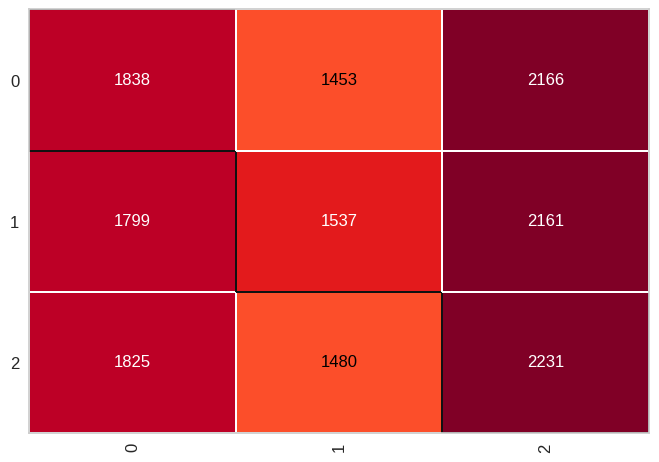

In [ ]:
cm = ConfusionMatrix(boosting_healthcare)
cm.fit(x_previsores_treinamento,y_classe_treinamento)
cm.score(x_previsores_teste,y_classe_teste)

In [ ]:
scores_boost = cross_val_score(boosting_healthcare,x_previsores_treinamento, y_classe_treinamento, cv=10)

print("\n--- Resultados do K-Fold (Boosting) ---")
print(f"Média Final: {scores_boost.mean() * 100:.2f}%")
print(f"Desvio Padrão: {scores_boost.std():.4f}")


--- Resultados do K-Fold (Boosting) ---
Média Final: 33.45%
Desvio Padrão: 0.0040


In [ ]:

data = {
    'Modelo': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Redes Neurais (MLP)', 'Gradient Boosting'],
    'Acurácia  (%)': [
        accuracy_score(y_classe_teste,previsao) * 100,
        accuracy_score(y_classe_teste,previsao_tree) * 100,
        accuracy_score(y_classe_teste,previsao_random_florest) * 100,
        accuracy_score(y_classe_teste,previsao_knn) * 100,
        accuracy_score(y_classe_teste,previsoes_mlp) * 100,
        accuracy_score(y_classe_teste,previsoes_boost) * 100
    ],
    'Acurácia Média (%)': [
        scores_naive_bayes.mean() * 100,
        scores_tree_decision.mean() * 100,
        scores_random_florest.mean() * 100,
        scores_knn.mean() * 100,
        scores_mlp.mean() * 100,
        scores_boost.mean() * 100
    ],
    'Desvio Padrão': [
        scores_naive_bayes.std(),
        scores_tree_decision.std(),
        scores_random_florest.std(),
        scores_knn.std(),
        scores_mlp.std(),
        scores_boost.std()
    ]
}


df_comparativo = pd.DataFrame(data)

# Ordenando pelo melhor desempenho
df_comparativo = df_comparativo.sort_values(by='Acurácia Média (%)', ascending=False)

print(df_comparativo.to_markdown(index=False))

| Modelo              |   Acurácia  (%) |   Acurácia Média (%) |   Desvio Padrão |
|:--------------------|----------------:|---------------------:|----------------:|
| Decision Tree       |         38.775  |              40.7033 |      0.00716782 |
| Random Forest       |         41.3705 |              40.7033 |      0.00716782 |
| Redes Neurais (MLP) |         35.9794 |              36.9243 |      0.00482814 |
| KNN                 |         35.9309 |              36.3603 |      0.0061667  |
| Naive Bayes         |         33.7295 |              33.5663 |      0.00685211 |
| Gradient Boosting   |         33.9964 |              33.4546 |      0.0040059  |


## 📊 Comparativo Final e Performance

Após a implementação de diversos algoritmos de classificação e a aplicação de **Validação Cruzada (K-Fold)** com 10 divisões, os resultados obtidos foram:

| Modelo              | Acurácia (%) | Acurácia Média (%) | Desvio Padrão |
|:--------------------|-------------:|-------------------:|--------------:|
| **Decision Tree** | 38.77        | **40.70** | 0.0071        |
| **Random Forest** | 41.37        | **40.70** | 0.0071        |
| **Redes Neurais** | 35.97        | 36.92              | 0.0048        |
| **KNN** | 35.93        | 36.36              | 0.0061        |
| **Naive Bayes** | 33.72        | 33.56              | 0.0068        |
| **Gradient Boosting**| 33.99       | 33.45              | 0.0040        |



---

## 🔍 Conclusões e Insights da Análise

### 1. Superioridade dos Modelos de Árvore
Os modelos baseados em árvores (**Decision Tree** e **Random Forest**) apresentaram a melhor performance. Isso ocorre porque esses algoritmos conseguem capturar melhor as interações não-lineares entre as variáveis, algo que modelos lineares ou probabilísticos simples tiveram dificuldade em processar neste dataset.

### 2. O Desafio da Baixa Correlação
A análise de correlação revelou que os atributos individuais (como idade, gênero e tipo de admissão) possuem uma relação baixíssima com o resultado final do teste. Isso explica por que a acurácia média ficou próxima dos 40%. Em problemas de classificação com 3 classes, o "acerto ao acaso" seria de 33,3%, o que indica que os modelos estão aprendendo sinais reais, porém sutis.

### 3. Estabilidade dos Resultados
O **baixo Desvio Padrão** observado em todos os modelos confirma que o problema não é a variabilidade dos dados (overfitting), mas sim a falta de "poder preditivo" nas variáveis atuais. O modelo é consistente em seus erros, sugerindo que os dados atuais não contêm todas as informações necessárias para uma previsão precisa.

